In [1]:
import os
import torch
import librosa
import torchaudio
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# data_dir = '/Users/rudyhendrawan/miniforge3/datasets/Bio-Akustik-Gajah'
data_dir = '/Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/'

In [91]:
# List of the text files (metadata) in the dataset
label_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]

# Initialize a list to store the metadata
metadata = pd.DataFrame()

# Iterate through the list of text files
for f in label_files:
	file_path = os.path.join(data_dir, f)
	# Read the text file
	try:
		df = pd.read_csv(
			file_path,
			sep='\t',
			encoding='ISO-8859-1',
			header=None,
			skiprows=1,
			names=['selection', 'view', 'channel', 'start_time', 'end_time', 'LowFreq', 'HighFreq', 'sound_category', 'sound_type', 'confidence', 'notes', 'name',])
	except pd.errors.ParserError:
		print(f'Error parsing file {f}')
	
	# Add the filename to the dataframe
	df['filename'] = f.replace('.txt', '.wav')

	# Concatenate the dataframes
	metadata = pd.concat([metadata, df], ignore_index=True)

metadata.head(10)

Error parsing file ELOC2_1654520897346_2022-06-06_23-08-17.txt


,selection,view,channel,start_time,end_time,LowFreq,HighFreq,sound_category,sound_type,confidence,notes,name,filename
0,1.0,Spectrogram 1,1.0,87.283492,87.757001,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
1,2.0,Spectrogram 1,1.0,343.451859,344.209474,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
2,3.0,Spectrogram 1,1.0,346.482317,347.050528,0.0,7582.6,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",giot,0mCage_Eloc_20211011_075014.wav
3,4.0,Spectrogram 1,1.0,2537.533797,2538.627547,0.0,8000.0,elephant_sound,unidentified,2.0,"Chris, mungkin ada yang mengganggu di belalai ...",giot,0mCage_Eloc_20211011_075014.wav
4,5.0,Spectrogram 1,1.0,2734.408793,2735.457900,0.0,8000.0,elephant_sound,unidentified,2.0,"Chris, mungkin ada yang mengganggu di belalai ...",giot,0mCage_Eloc_20211011_075014.wav
5,6.0,Spectrogram 1,1.0,3559.977970,3560.692256,0.0,8000.0,elephant_sound,unidentified,3.0,"not sure from which elephant, maybe Eropa (?)",giot,0mCage_Eloc_20211011_075014.wav
6,1.0,Spectrogram 1,1.0,1850.412914,1850.915146,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, play/afraid",Giot,0mCage_Eloc_20211011_085014.wav
7,2.0,Spectrogram 1,1.0,2132.734338,2133.415141,0.0,8000.0,elephant_vocalization,trumpet,3.0,"Boni, afraid",Giot,0mCage_Eloc_20211011_085014.wav
8,3.0,Spectrogram 1,1.0,3049.477440,3049.901547,260.9,4643.5,elephant_vocalization,trumpet,2.0,"yuni, habis dimarahin mahout karna ambil pisan...",Giot,0mCage_Eloc_20211011_085014.wav
9,1.0,Spectrogram 1,1.0,699.814732,700.667048,393.5,2367.3,elephant_vocalization,trumpet,3.0,maybe Olive from far away,Giot,0mCage_Eloc_20211011_155016.wav


In [92]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selection       2046 non-null   object 
 1   view            2046 non-null   object 
 2   channel         2046 non-null   float64
 3   start_time      2046 non-null   float64
 4   end_time        2046 non-null   float64
 5   LowFreq         2046 non-null   float64
 6   HighFreq        2046 non-null   object 
 7   sound_category  2022 non-null   object 
 8   sound_type      2020 non-null   object 
 9   confidence      2019 non-null   object 
 10  notes           1087 non-null   object 
 11  name            2045 non-null   object 
 12  filename        2062 non-null   object 
dtypes: float64(4), object(9)
memory usage: 209.5+ KB


### Handling the errors' label file manually

In [93]:
missing_file = pd.read_csv(
	os.path.join(data_dir, 'ELOC2_1654520897346_2022-06-06_23-08-17.txt'), 
	sep='\t',
	encoding='ISO-8859-1',
	header=None,
	skiprows=1,
	on_bad_lines='skip',
	names=['selection', 'view', 'channel', 'start_time', 'end_time', 'LowFreq', 'HighFreq', 'sound_category', 'sound_type', 'confidence', 'notes', 'name',]
	)
missing_file['filename'] = 'ELOC2_1654520897346_2022-06-06_23-08-17.wav'
missing_file

,selection,view,channel,start_time,end_time,LowFreq,HighFreq,sound_category,sound_type,confidence,notes,name,filename
0,2,Spectrogram 1,1,1523.189632,1524.441149,96.200,4154.200,elephant_vocalization,trumpet,3,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
1,3,Spectrogram 1,1,2723.638791,2724.966225,12.800,2381.600,elephant_vocalization,bark,3,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
2,4,Spectrogram 1,1,21.231401,23.433828,24.130,63.996,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
3,5,Spectrogram 1,1,681.857290,685.733562,14.688,53.505,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
4,7,Spectrogram 1,1,1556.254290,1559.690076,17.804,31.899,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
5,8,Spectrogram 1,1,1908.304676,1912.445240,20.030,31.899,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav


In [94]:
# Missing value
missing_value = {
'selection': 6,
'view': 'Spectrogram 1',
'channel': 1,
'start_time': 1526.725179890,
'end_time': 1532.980073956,
'LowFreq': 23.081,
'HighFreq': 36.719,
'sound_category': 'elephant_vocalization',
'sound_type': 'growl',
'confidence': 1,
'notes': None,
'name': 'fanny',
'filename': 'ELOC2_1654520897346_2022-06-06_23-08-17.wav'
}

# Concat missing_value to missing_file dataframe
missing_file = pd.concat([missing_file, pd.DataFrame(missing_value, index=[0])], ignore_index=True)
missing_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selection       7 non-null      int64  
 1   view            7 non-null      object 
 2   channel         7 non-null      int64  
 3   start_time      7 non-null      float64
 4   end_time        7 non-null      float64
 5   LowFreq         7 non-null      float64
 6   HighFreq        7 non-null      float64
 7   sound_category  7 non-null      object 
 8   sound_type      7 non-null      object 
 9   confidence      7 non-null      int64  
 10  notes           0 non-null      object 
 11  name            7 non-null      object 
 12  filename        7 non-null      object 
dtypes: float64(4), int64(3), object(6)
memory usage: 856.0+ bytes


In [95]:
# Concat missing_file to metadata dataframe
metadata = pd.concat([metadata, missing_file], ignore_index=True)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selection       2053 non-null   object 
 1   view            2053 non-null   object 
 2   channel         2053 non-null   float64
 3   start_time      2053 non-null   float64
 4   end_time        2053 non-null   float64
 5   LowFreq         2053 non-null   float64
 6   HighFreq        2053 non-null   object 
 7   sound_category  2029 non-null   object 
 8   sound_type      2027 non-null   object 
 9   confidence      2026 non-null   object 
 10  notes           1087 non-null   object 
 11  name            2052 non-null   object 
 12  filename        2069 non-null   object 
dtypes: float64(4), object(9)
memory usage: 210.3+ KB


In [96]:
metadata.tail()

,selection,view,channel,start_time,end_time,LowFreq,HighFreq,sound_category,sound_type,confidence,notes,name,filename
2064,4,Spectrogram 1,1.0,21.231401,23.433828,24.130,63.996,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
2065,5,Spectrogram 1,1.0,681.857290,685.733562,14.688,53.505,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
2066,7,Spectrogram 1,1.0,1556.254290,1559.690076,17.804,31.899,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
2067,8,Spectrogram 1,1.0,1908.304676,1912.445240,20.030,31.899,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
2068,6,Spectrogram 1,1.0,1526.725180,1532.980074,23.081,36.719,elephant_vocalization,growl,1,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav


In [97]:
# metadata.to_csv('codes/Riset-AI-SIKGM/metadata.csv', encoding='utf-8', index=False)

In [98]:
len(label_files)

207

In [72]:
metadata.shape

(2069, 13)

In [73]:
metadata.iloc[0]['start_time']

87.283491787

In [99]:
import librosa
from IPython.display import Audio

audio_file = os.path.join(data_dir, metadata.iloc[2]['filename'])
start_time = metadata.iloc[2]['start_time']
end_time = metadata.iloc[2]['end_time']
print("Start time: ", start_time)
print("End time: ", end_time)

# Load audio
audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=False)

# Convert start and end times to sample indices
start_idx= librosa.time_to_samples(start_time, sr=sample_rate)
end_idx = librosa.time_to_samples(end_time, sr=sample_rate)

audio_segment = audio_data[start_idx:end_idx]

print("Audio data shape: {}".format(audio_data.shape))
print("Sample rate: {}".format(sample_rate))

print("Audio segment: {}".format(audio_segment))
print("Audio segment shape: {}".format(audio_segment.shape))
print(start_idx)
print(end_idx)

# Reshape to (1, xx) if mono
if audio_segment.ndim == 1:
	audio_segment = audio_segment.reshape(1, -1)
print("Audio segment: {}".format(audio_segment))
print("Audio segment shape: {}".format(audio_segment.shape))
print(audio_segment[0])

Start time:  346.482316766
End time:  347.050527563
Audio data shape: (57600000,)
Sample rate: 16000
Audio segment: [ 0.00872803 -0.00643921  0.01123047 ... -0.01092529 -0.00466919
  0.00405884]
Audio segment shape: (9091,)
5543717
5552808
Audio segment: [[ 0.00872803 -0.00643921  0.01123047 ... -0.01092529 -0.00466919
   0.00405884]]
Audio segment shape: (1, 9091)
[ 0.00872803 -0.00643921  0.01123047 ... -0.01092529 -0.00466919
  0.00405884]


In [100]:
Audio(audio_segment[0], rate=sample_rate)

In [101]:
def plot_waveform(waveform, sample_rate):
	num_channels, num_frames = waveform.shape
	time_axis = torch.arange(0, num_frames) / sample_rate
	figure, axes = plt.subplots(num_channels, 1)

	if num_channels == 1:
		axes = [axes]
	
	for c in range(num_channels):
		axes[c].plot(time_axis, waveform[c], linewidth=1)
		axes[c].grid(True)
		if num_channels > 1:
			axes[c].set_ylabel(f'Channel {c+1}')
	
	figure.suptitle('Waveform')
	plt.show(block=False)

def plot_spectogram(waveform, sample_rate, title='Spectrogram'):
	num_channels, num_frames = waveform.shape
	figure, axes = plt.subplots(num_channels, 1)

	if num_channels == 1:
		axes = [axes]

	for c in range(num_channels):
		axes[c].specgram(waveform[c], Fs=sample_rate)
		axes[c].grid(True)
		if num_channels > 1:
			axes[c].set_ylabel(f'Channel {c+1}')
	
	figure.suptitle(title)
	plt.show(block=False)

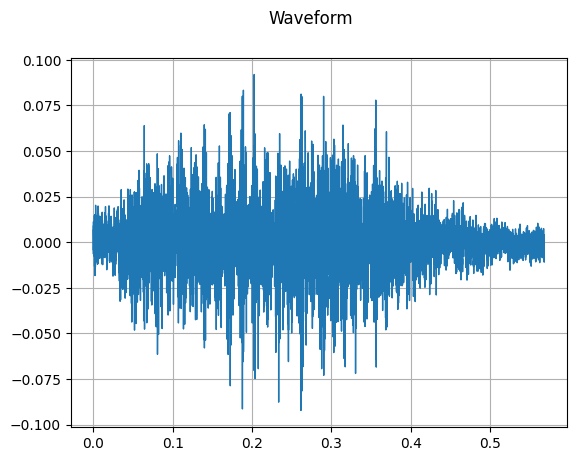

In [102]:
plot_waveform(audio_segment, sample_rate)

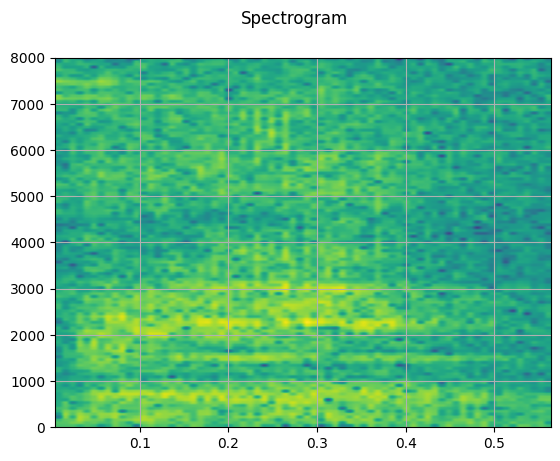

In [103]:
plot_spectogram(audio_segment, sample_rate)

### Check If Any NaN Values

In [104]:
# Check if there is any missing filename
metadata['filename'].isna().sum()

0

In [105]:
# Check any other missing values
metadata.isna().sum()

selection          16
view               16
channel            16
start_time         16
end_time           16
LowFreq            16
HighFreq           16
sound_category     40
sound_type         42
confidence         43
notes             982
name               17
filename            0
dtype: int64

**Summary**
1. Total number of NaN values in `start_time` and `end_time` attribute are 16.
2. Total number of NaN values in `sound_type` attribute are 42.

**Cause!**
1. Some files can't be read by pandas.

**Conclusion**
1. `start_time` and `end_time` attribute is crusial because we need the to slice the audio file.
2. `sound_type` also crusial because it is the label/class of the audio file.
3. We handles the error in the label file manually.

After handling the error, we can read the dataset again.

In [3]:
new_metadata = pd.read_csv('codes/Riset-AI-SIKGM/metadata.csv')
new_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   selection       2060 non-null   int64  
 1   view            2060 non-null   object 
 2   channel         2060 non-null   int64  
 3   start_time      2060 non-null   float64
 4   end_time        2060 non-null   float64
 5   LowFreq         2060 non-null   float64
 6   HighFreq        2060 non-null   float64
 7   sound_category  2036 non-null   object 
 8   sound_type      2060 non-null   object 
 9   confidence      2033 non-null   float64
 10  notes           1087 non-null   object 
 11  name            2053 non-null   object 
 12  filename        2060 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 209.3+ KB


In [4]:
new_metadata.isna().sum()

selection           0
view                0
channel             0
start_time          0
end_time            0
LowFreq             0
HighFreq            0
sound_category     24
sound_type          0
confidence         27
notes             973
name                7
filename            0
dtype: int64

In [ ]:
# missing_class_data.to_csv('codes/Riset-AI-SIKGM/missing-label.csv', encoding='utf-8', index=False)

In [8]:
new_metadata['sound_type'].value_counts()

rumble                     753
trumpet                    410
growl                      215
unidentified               167
roar                       107
motorcycle_sound            94
snort                       78
firecracker                 73
roar_rumble                 54
breathing                   43
fart                        12
vehicle_sound                8
bark_rumble                  8
talking                      8
long_roar                    8
bark                         7
water_splash                 3
breaking_branch              3
drink                        2
breaking_grass               2
suara Tongat                 1
groan                        1
long_roar_rumble             1
splatter_sand_and_water      1
scream                       1
Name: sound_type, dtype: int64

### Function Process and Save Audio Segment

In [9]:
import soundfile as sf

def process_and_save_audio_segments(metadata_df, input_audio_dir, output_audio_dir):
	output_metadata = []
	class_counts = {}

	for index, row in metadata_df.iterrows():
		# Extract metadata
		start_time = row['start_time']
		end_time = row['end_time']
		class_name = row['sound_type']
		filename = row['filename']

		# Load the audio file
		try:
			audio_file_path = os.path.join(input_audio_dir, filename)
			audio_data, sample_rate = librosa.load(audio_file_path)
		except Exception as e:
			print(f'Error while loading {audio_file_path}: {e}')
			continue

		# Convert start and end times to sample indices
		start_sample = librosa.time_to_samples(start_time, sr=sample_rate)
		end_sample = librosa.time_to_samples(end_time, sr=sample_rate)

		# Extract the audio segment
		audio_segment = audio_data[start_sample:end_sample]
		
		# Create output filename and path
		# The index value is sequential relative to the class, e.g. growl_0.wav, growl_1.wav, rumble_0.wav, rumble_1.wav, etc.
		if class_name not in class_counts:
			class_counts[class_name] = 0

		output_filename = f'{class_name}_{class_counts[class_name]}.wav'
		output_file_path = os.path.join(output_audio_dir, output_filename)
		# output_filename = f'{class_name}_{index}.wav'
		# output_file_path = os.path.join(output_audio_dir, output_filename)

		# Save the audio segment as WAV File
		try:
			sf.write(output_file_path, audio_segment, sample_rate)
			print(f'Saved {output_filename} to {output_audio_dir} successfully')
		except Exception as e:
			print(f'Error while saving {output_filename}: {e}')

		class_counts[class_name] += 1

		# Add the metadata to the list
		output_metadata.append({
			'filename': output_filename,
			'sound_type': class_name,
			'sample_rate': sample_rate,
		})

	# Convert the list to Pandas DataFrame
	output_metadata = pd.DataFrame(output_metadata)
	return output_metadata

In [10]:
sample_data = new_metadata.sample(10)
sample_data

,selection,view,channel,start_time,end_time,LowFreq,HighFreq,sound_category,sound_type,confidence,notes,name,filename
1521,28,Spectrogram 1,1,728.709565,729.708737,1.000,8000.000,human_sound,firecracker,3.0,NaN,stefan,ELOC8_1654429009281_2022-06-05_20-36-49.wav
601,15,Spectrogram 1,1,3273.612354,3275.885197,17.400,120.100,elephant_vocalization,rumble,3.0,Agustin,Giot,Angon4_Eloc_20211007_151741.wav
450,24,Spectrogram 1,1,2113.033985,2117.153514,21.700,153.300,elephant_vocalization,rumble,3.0,NaN,Giot,Angon1_Eloc_20210924_123629.wav
106,9,Spectrogram 1,1,2557.147081,2561.678717,16.300,175.500,elephant_vocalization,rumble,3.0,don't know which elephants,Giot,0mCage_Swift1_20210918_180100.wav
595,9,Spectrogram 1,1,3054.653902,3056.705774,9.200,1455.800,elephant_vocalization,roar,2.0,"Boni, looking for her mother, calling her mother",Giot,Angon4_Eloc_20211007_151741.wav
610,8,Spectrogram 1,1,3539.389600,3540.462888,2573.913,8000.000,NaN,unidentified,NaN,orang utan,Giot,Angon5_Eloc_20211009_102410.wav
593,7,Spectrogram 1,1,3041.742879,3043.636915,0.000,626.100,elephant_vocalization,roar,2.0,"Boni, looking for her mother, calling her mother",Giot,Angon4_Eloc_20211007_151741.wav
1350,10,Spectrogram 1,1,150.917478,158.493829,13.566,80.383,elephant_vocalization,growl,2.0,NaN,fanny,ELOC2_1654520897346_2022-06-06_23-08-17.wav
1978,17,Spectrogram 1,1,1151.676669,1152.582466,467.800,1465.400,elephant_vocalization,trumpet,3.0,NaN,tami,Swift6_20220710_080003.wav
486,7,Spectrogram 1,1,2928.337497,2933.056803,19.600,161.800,elephant_vocalization,rumble,3.0,Agustin,Giot,Angon3_Eloc_20211005_123557.wav


In [11]:
output_sample_data = process_and_save_audio_segments(
	metadata_df=sample_data, 
	input_audio_dir=data_dir, 
	output_audio_dir=os.path.join(data_dir, 'sample_data'),
)

output_sample_data

Saved firecracker_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved rumble_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved rumble_1.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved rumble_2.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved roar_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved unidentified_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved roar_1.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved growl_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved trumpet_0.wav to /Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data successfully
Saved rumble_3.wav to /Users/rudyh/Documents/Python/datas

,filename,sound_type,sample_rate
0,firecracker_0.wav,firecracker,22050
1,rumble_0.wav,rumble,22050
2,rumble_1.wav,rumble,22050
3,rumble_2.wav,rumble,22050
4,roar_0.wav,roar,22050
5,unidentified_0.wav,unidentified,22050
6,roar_1.wav,roar,22050
7,growl_0.wav,growl,22050
8,trumpet_0.wav,trumpet,22050
9,rumble_3.wav,rumble,22050


In [12]:
sample_dir = os.path.join(data_dir, 'sample_data')
print(os.path.join(sample_dir, 'unidentified_0.wav'))

/Users/rudyh/Documents/Python/datasets/Bio-Akustik-Gajah/sample_data\unidentified_0.wav


In [115]:
# sample = torchaudio.info(os.path.join(sample_dir, 'firecracker_1534.wav'))
# print(sample)

AudioMetaData(sample_rate=22050, num_frames=11863, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [117]:
# Audio(os.path.join(sample_dir, 'firecracker_1534.wav'))

In [116]:
# sample = torchaudio.info(os.path.join(sample_dir, 'roar_1782.wav'))
# print(sample)

AudioMetaData(sample_rate=22050, num_frames=137564, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [13]:
# Store torchaudio.info() return values to dataframe
output_sample_data['num_frames'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).num_frames
)
output_sample_data['num_channels'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).num_channels
)
output_sample_data['bits_per_sample'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).bits_per_sample
)
output_sample_data['encoding'] = output_sample_data['filename'].apply(
	lambda x: torchaudio.info(os.path.join(sample_dir, x)).encoding
)
output_sample_data

,filename,sound_type,sample_rate,num_frames,num_channels,bits_per_sample,encoding
0,firecracker_0.wav,firecracker,22050,22032,1,16,PCM_S
1,rumble_0.wav,rumble,22050,50116,1,16,PCM_S
2,rumble_1.wav,rumble,22050,90835,1,16,PCM_S
3,rumble_2.wav,rumble,22050,99922,1,16,PCM_S
4,roar_0.wav,roar,22050,45244,1,16,PCM_S
5,unidentified_0.wav,unidentified,22050,23666,1,16,PCM_S
6,roar_1.wav,roar,22050,41763,1,16,PCM_S
7,growl_0.wav,growl,22050,167058,1,16,PCM_S
8,trumpet_0.wav,trumpet,22050,19973,1,16,PCM_S
9,rumble_3.wav,rumble,22050,104061,1,16,PCM_S


### Data Analysis

In [120]:
new_metadata.isna().sum()

selection           0
view                0
channel             0
start_time          0
end_time            0
LowFreq             0
HighFreq            0
sound_category     24
sound_type          0
confidence         27
notes             973
name                7
filename            0
dtype: int64

In [121]:
# Get the unique sound types as class name
class_name = new_metadata['sound_type'].unique()
print("Class names: {}".format(class_name))

Class names: ['trumpet' 'unidentified' 'rumble' 'long_roar' 'roar' 'snort' 'breathing'
 'roar_rumble' 'splatter_sand_and_water' 'growl' 'long_roar_rumble'
 'bark_rumble' 'groan' 'bark' 'fart' 'motorcycle_sound' 'breaking_grass'
 'firecracker' 'drink' 'water_splash' 'breaking_branch' 'talking'
 'suara Tongat' 'vehicle_sound' 'scream']


In [122]:
# Count values of each class
new_metadata['sound_type'].value_counts()

rumble                     753
trumpet                    410
growl                      215
unidentified               167
roar                       107
motorcycle_sound            94
snort                       78
firecracker                 73
roar_rumble                 54
breathing                   43
fart                        12
vehicle_sound                8
bark_rumble                  8
talking                      8
long_roar                    8
bark                         7
water_splash                 3
breaking_branch              3
drink                        2
breaking_grass               2
suara Tongat                 1
groan                        1
long_roar_rumble             1
splatter_sand_and_water      1
scream                       1
Name: sound_type, dtype: int64

In [ ]:
original_class = ['trumpet', 'growl', 'roar', 'roar_rumble', 'rumble', 'bark', 'bark_rumble']